In [10]:
!pip install pandas

In [11]:
import pandas as pd

In [12]:
orders=pd.read_csv('/home/user1/Desktops/Desktop1/orders.csv')

In [13]:
expenses=pd.read_csv('/run/user/1000/fly-fm-vfs/archives/0d2afae09a7a8fca37ebe47de65d8301/Data/expenses.csv')

In [14]:
data=pd.read_csv('/run/user/1000/fly-fm-vfs/archives/0d2afae09a7a8fca37ebe47de65d8301/Data/visitation.csv')


In [15]:
data.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,Russia,iPhone,organic,2022-05-01 02:36:01,2022-05-01 02:45:01
1,278965908054,Russia,iPhone,organic,2022-05-01 04:46:31,2022-05-01 04:47:35
2,590706206550,Russia,Mac,organic,2022-05-01 14:09:25,2022-05-01 15:32:08
3,326433527971,Russia,Android,TipTop,2022-05-01 00:29:59,2022-05-01 00:54:25
4,349773784594,Russia,Mac,organic,2022-05-01 03:33:35,2022-05-01 03:57:40


# 2.3 Создание профилей пользователей

смотрю из каких стран приходят пользователи больше всего


In [16]:
data['Region'].value_counts()

Region
Russia      207327
Turkey       36419
Thailand     35396
China        30759
Name: count, dtype: int64

из России приходит наибольшее количество пользователей 

вывожу по каким сайтам пришло больше всего людей

In [17]:
data['Channel'].value_counts()

Channel
organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: count, dtype: int64

могу выдели топ-3 сайта это : 

organic               107760

TipTop                 54794

FaceBoom               49022

смотрю каким девайсом пользуются большинство людей

In [18]:
data['Device'].value_counts()

Device
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: count, dtype: int64

пользователи больше всего пользуются iPhone

Используя ранее определенную функцию я построил набор данных с профилями
пользователей. Определил:
−
 Из каких стран приходят посетители. Какие страны дают больше всего
платящих пользователей.
−
 Какими устройствами они пользуются. С каких устройств чаще всего
заходят платящие пользователи.
По каким рекламным каналам шло привлечение пользователей. Какие каналы
приносят больше всего платящих пользователей.

# 2.4 Маркетинговый анализ

In [19]:
expenses.head()

,dt,Channel,costs
0,2022-05-01,FaceBoom,113.3
1,2022-05-02,FaceBoom,78.1
2,2022-05-03,FaceBoom,85.8
3,2022-05-04,FaceBoom,136.4
4,2022-05-05,FaceBoom,122.1


вывожу затраты за сайты

In [20]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = expenses.groupby('Channel')['costs'].sum()
channel_costs_report.sort_values(by='costs', ascending=False)#.style.format({'share': '{:.0f}%', 'payer_share': '{:.2f

,costs
Channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [21]:
expenses['costs'].sum().round()

105497.0

105497.0 - Общая сумма расходов на маркетинг 


Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 80% всех затрат.

In [22]:
!pip install matplotlib

In [23]:
from matplotlib import pyplot as plt

визуализирую затраты 

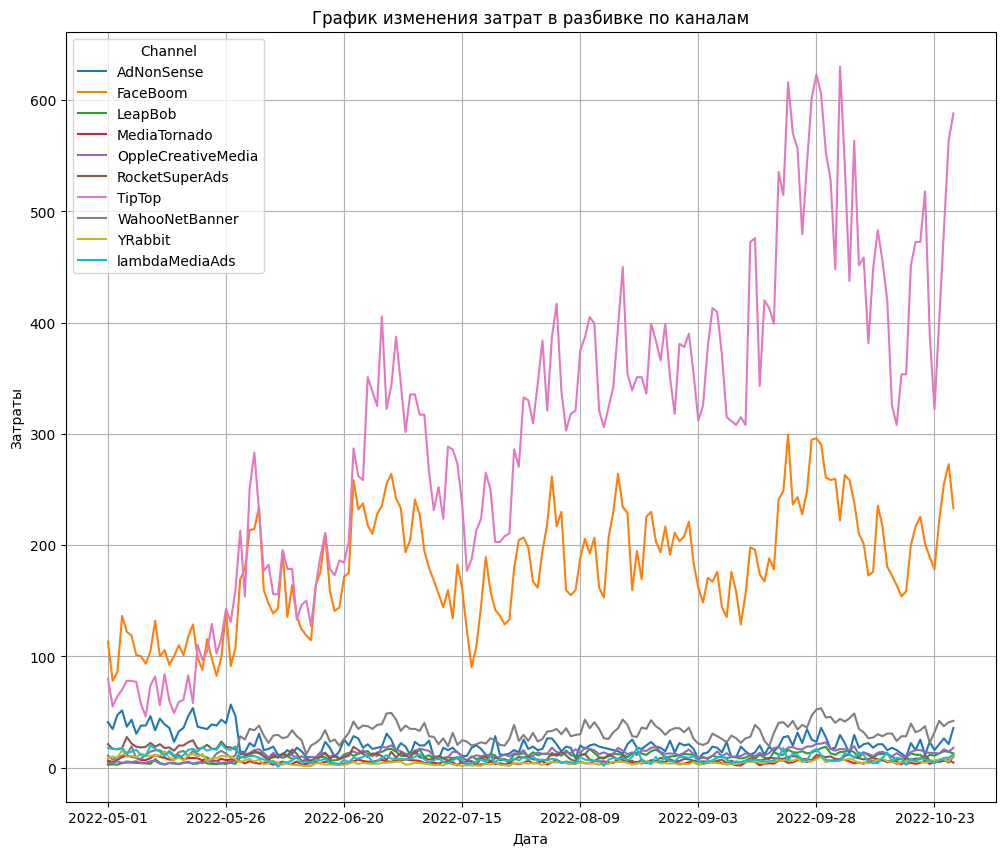

In [24]:
filtered_data = expenses.pivot_table(
        index='dt', columns='Channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Можно сделать вывод, что затраты на маркетинг со временем возрастали только на двух каналах: TipTop и FaceBoom

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

в ходе этого модуля я определил сколько денег потратили вообщем  и визуализировал затраты сайта 